<a href="https://colab.research.google.com/github/jjschueder/7331DataMiningNotebooks/blob/master/lab3/Lab3tnse3d_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Mining 7331 - Spring 2020**

DUE APRIL 12th (sunday)



* jw -
    * Add link to lab 1
    * Scatter plots for 3-4 important features from lab 2
    * update deployment and the business understanding

* Daniel
 
  * add in homogeneity, completeness, ect into scores
  * Look into improving silhouette scores by increasing number of clusters
  https://github.com/bici-sancta/mashable/blob/master/lab_03/04_spectral_cluster.ipynb

* Armando
  * Business Understanding

* Joe
  * Agglomorative
  * Graph-based clustering
  * Look into accuracy score on each cluster configuration
   * Include random forest and one using our clustering to see if we improve score
   * drop in modeling and eval 4 (ramifications)


TO DO: 

* Include visuals on the random performance performance (possibly an ROC curve comparing the lines for a clustered dataset and non clusters (include feature performance as well)

* Drop in Deployment /  / Exceptional work
    * Potentially try to cluster against non transformed data
    * Include agglomerative and db scan



## Lab 3 -  Clustering, Association Rules, or Recommenders 

#### Daniel Clark, Joe Schueder, Jeff Washburn, Armando Vela

Final Team Project
CRISP-DM Capstone: Association Rule Mining, Clustering, or Collaborative Filtering  
In the final assignment for this course, you will be using one of three different analysis methods:  
• Option A: Use clustering on an unlabeled dataset to provide insight or features  
• Option B: Use transaction data for mining associations rules  
• Option C: Use collaborative filtering to build a custom recommendation system
Your choice of dataset will largely determine the task that you are trying to achieve, though the
dataset does not need to change from your previous tasks.  
• For example, you might choose to use clustering on your data as a preprocessing step that  
extracts different features. Then you can use those features to build a classifier and analyze
its performance in terms of accuracy (precision, recall) and speed.  
• Alternatively, you might choose a completely different dataset and perform rule mining or
build a recommendation system.
Dataset Selection and Toolkits
As before, you need to choose a dataset that is not small. It might be massive in terms of the
number of attributes (or transactions), classes (or items, users, etc.) or whatever is appropriate
for the task you are performing. Note that scikit-learn can be used for clustering analysis, but not
for Association Rule Mining (you should use R) or collaborative filtering (you should use
graphlabcreate from Dato). Both can be run using Jupyter notebooks as shown in lecture.  
• One example of a recommendation dataset is the movie lens rating data:
http://grouplens.org/ datasets/movielens/  
• Some examples of association rule mining datasets: http://fimi.ua.ac.be/data/
Write a report covering in detail all the steps of the project. The results need to be reproducible
using only this report. Describe all assumptions you make and include all code you use in the
Jupyter notebook or as supplemental functions. Follow the CRISP-DM framework in your
analysis (you are performing all of the CRISP-DM outline).  
This report is worth 20% of the final grade. 

## Business Understanding 1 (10 points)



### Introduction
The Iowa Liquor Sales dataset is an API from Google’s Bigquery which contains the wholesale purchases by retail stores in the Iowa area. The dataset includes the spirit purchase details by product, date of purchase, and location the item was purchased from an Iowa Class “E” liquor license holder (retail stores). The time frame of this data starts from January 1, 2012 through December 31, 2019. As part of the study commissioned by the Iowa Department of Commerce, all alcoholic sales within the state were logged into the Department system, and in turn, published as open data by the State of Iowa. The dataset contains detail on the name, product, quantity and location of the individual container or package sale between the wholesaler (vendor) and the retailer.

**Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?).**

The Iowa Liquor Sales dataset is an API from Google’s Bigquery which contains the wholesale purchases byretail stores in the Iowa area. The dataset includes the spirit purchase details by product, date of purchase,and location the item was purchased from an Iowa Class “E” liquor license holder (retail stores). The time frame of this data starts from January 1, 2012 through December 31, 2019. As part of the study commissioned by the Iowa Department of Commerce, all alcoholic sales within the state were logged into the Department system, and in turn, published as open data by the State of Iowa. The dataset contains detail on the name, product, quantity and location of the individual container or package sale between the wholesaler (vendor) and the retailer.


The initial data set was 4.63GB with 17.7 million rows. We subsetted that down to 400k rows using a random set of data from the 2019 sales data. This work was done in our initial processing from earlier. We further reduced the data down to only using 40k rows. We found that running 400k worth of data was taking a tremendous amount of time.


So taking our initial processing that was done from previous work, we further refined the 40k dataset by one-hot encoding the categorical features for sales month, liquor categories, and the stores. The stores will not be used in this analysis.


It's also worth noting, that we used the log transformed values for sales dollars, cost per liter, state bottle cost and volume sold in liters along with the liquor category to focus on our classification and ensure that outliers do not hold too heavy of a weight in our analysis.


**How will you measure the effectiveness of a good algorithm?** 

Our goal of the models will be to cluster the associated liquor type.  To measure the effectiveness of each algorithm we will be comparing the calculated Silhouette score (ie Silhouette Coefficient).  Additional details regarding the silhouette score is below.

Silhouette Score – Per scikit learn documentation, “The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearestcluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.  


The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.


**Why does your chosen validation method make sense for this specific dataset and the stakeholders needs?**

The Silhouette Score makes sense as an acceptable validation snice it allows us to compare the effectiveness of different clustering algorithms.  With that said, we are able to run multiple clustering algorithms and have confidence in determine which has the best clustering ability.  Furthermore, the readability of a silhouette score (ie. “best value is 1 and the worst value is -1”) will be essential in quickly showing stakeholders which model clusters the associated liquor type correctly.

## Data Understanding 1 (10 points)


The initial data set was 4.63GB with 17.7 million rows. We subsetted that down to 400k rows using a random set of data from the 2019 sales data. This work was done in our initial processing from earlier. We further reduced the data down to only using 40k rows. We found that running 400k worth of data was taking a tremendous amount of time. 

So taking our initial processing that was done from previous work, we further refined the 400k dataset by one-hot encoding the categorical features for sales month, liquor categories, and the stores. The stores will not be used in this analysis; however, it was still one-hot encoded for future analysis. From there, we took 40k rows to build our classification models

It's also worth noting, that we used the log transformed values for sales dollars, cost per liter, state bottle cost and volume sold in liters along with the liquor catogory to focus on our classification and ensure that outliers do not hold too heavy of a weight in our analysis. 

Each record in the dataset has been formatted so that it represents a single sale between liquor retailer and wholealer. The liquor type varies by each instance and can represent a wide variety of sale sizes and prices, so we will need to use a clustering algorithm without a known liquor type for each designation. To do this, we will attempt to cluster with 7 total clusters defined by 3 different clustering algorithm corresponding with each of the liquor types present

For this data, we will be attempting to cluster our data on the basis of the liquor type that we classified against in lab 2, and apply that cluster into our classifier model as an an additional feature that could strengthen our classifier. Our dataset consists of a number of features that can track the sales and records of purchases made in the state of Iowa from wholesaler to retailer. This can include quantanty detail on how much alcohol was sold during the purchase, how much the sale was for, how much profit was made, and other additional features slicing and dicing those details. The dataset includes all of 2019 data and tracks sales all over the state of Iowa.

More info can be found on our starting dataset here at: https://github.com/jjschueder/7331DataMiningNotebooks/blob/master/lab1/msds7331_clark_schueder_vela_washburn.ipynb


In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')
data = pd.read_csv("/content/drive/My Drive/ColabNotebooks/cleandata.csv", nrows = 40000)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:


#url_dataset = 'https://raw.githubusercontent.com/jjschueder/7331DataMiningNotebooks/master/Live%20Assignments/df1hotmerge2.csv'
#data = pd.read_csv(url_dataset, nrows = 40000)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                40000 non-null  int64  
 1   invoice_and_item_number   40000 non-null  object 
 2   date                      40000 non-null  object 
 3   store_number              40000 non-null  int64  
 4   store_name                40000 non-null  object 
 5   address                   40000 non-null  object 
 6   city                      40000 non-null  object 
 7   zip_code                  40000 non-null  object 
 8   store_location            40000 non-null  object 
 9   county_number             40000 non-null  object 
 10  county                    40000 non-null  object 
 11  category                  40000 non-null  object 
 12  category_name             40000 non-null  object 
 13  vendor_number             40000 non-null  int64  
 14  vendor

In [3]:
# Import all necessary libraries we will be using in our dataset

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re
import sklearn
import statistics
import random

from sklearn.feature_selection import SelectKBest, chi2, SelectPercentile, RFE, SelectFromModel

from sklearn.preprocessing import StandardScaler, Binarizer

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, auc, roc_curve
from IPython.display import display, HTML

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, TimeSeriesSplit, StratifiedShuffleSplit

from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor,AdaBoostClassifier,RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


%matplotlib inline

matplotlib.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')
print(data.shape)
data.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(40000, 37)


,Unnamed: 0,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,counter,liquor_category,store_parent,month,year,monthyear,sale_dollars_trans,cost_per_liter,cost_per_liter_trans,state_bottle_cost_trans,bottles_sold_trans,volume_sold_liters_trans
0,0,INV-23084400002,2019-11-07,3869,BOOTLEGGIN' BARZINI'S FIN,412 1st Ave,Coralville,52241.0,POINT (-91.565517 41.672672),52.0,JOHNSON,1092100.0,IMPORTED DISTILLED SPIRIT SPECIALTY,293,JINRO AMERICA INC,989215,JINRO CHAMISUL GRAPEFRUIT SOJU,20,375,3.85,5.78,20.0,115.60,7.50,1.98,1.0,Other,Other,Nov,2019,Nov-2019,4.750136,15.413333,2.735233,1.348073,2.995732,2.014903
1,1,INV-23282200001,2019-11-18,4617,LICKETY LIQUOR,2501 HUBBELL AVE,Des Moines,50317.0,POINT (-93.570489 41.607817),77.0,POLK,1091300.0,NEUTRAL GRAIN SPIRITS FLAVORED,346,OLE SMOKY DISTILLERY LLC,86739,OLE SMOKY APPLE PIE MOONSHINE 70PRF MINI,8,50,8.75,13.13,1.0,13.13,0.05,0.01,1.0,Other,Other,Nov,2019,Nov-2019,2.574900,262.600000,5.570632,2.169054,0.000000,-2.995732
2,2,INV-19435800130,2019-05-17,2560,HY-VEE FOOD STORE / MARION,3600 Business Hwy 151 East,Marion,52302.0,blank,57.0,LINN,1042100.0,IMPORTED DRY GINS,35,BACARDI USA INC,28233,BOMBAY SAPPHIRE GIN,12,1000,16.50,24.75,6.0,148.50,6.00,1.58,1.0,GIN,Hy-Vee,May,2019,May-2019,5.000585,24.750000,3.208825,2.803360,1.791759,1.791759
3,3,INV-23454200002,2019-11-25,2614,HY-VEE #3 FOOD & DRUGSTORE / DAVENPORT,1823 E Kimberly Rd,Davenport,52807.0,POINT (-90.548919 41.55678100000001),82.0,SCOTT,1011300.0,SINGLE BARREL BOURBON WHISKIES,184,FOUR ROSES DISTILLERY,18350,FOUR ROSES SINGLE BARREL,6,750,21.17,31.76,24.0,762.24,18.00,4.75,1.0,WHISKY,Hy-Vee,Nov,2019,Nov-2019,6.636261,42.346667,3.745890,3.052585,3.178054,2.890372
4,4,INV-23541200001,2019-11-27,2629,HY-VEE FOOD STORE #2 / COUNCIL BLUFFS,1745 Madison Ave,Council Bluffs,51503.0,POINT (-95.825137 41.242732),78.0,POTTAWATTA,1901200.0,SPECIAL ORDER ITEMS,285,Charles Jacquin Et Cie,902291,SOOH BARTENDERS BANANAS OVER YOU,6,1750,9.31,13.97,12.0,167.64,21.00,5.54,1.0,Other,Hy-Vee,Nov,2019,Nov-2019,5.121819,7.982857,2.077296,2.231089,2.484907,3.044522


##### Our data Preparation includes the following layout

Since we are predicting our liquor category type (opening to the entire list of categories and not just one), we can assign them a numerical value.
Create new variables using aggredate data on profit, total cost and revenue
Since we transformed a number of continuous variables, we can drop them so that we are working directly on our normalized data

In [4]:
# Since we are predicting our liquor category type (opening to the entire list of categories and not just one), we can assign them a numerical value.

print (data['liquor_category'].unique())

"""df = pd.DataFrame({'col_1':[133,255,36,477,55,63]})
d = {'1':'M', '2': 'C', '3':'a', '4':'f', '5':'r', '6':'s'}
def ifef(col):
    col = str(col)
    return d[col[0]]

df['id_label'] = df['col_1'].apply(ifef)
print(df)"""

d = {'O':'1', 'G': '2', 'W':'3', 'T':'4', 'L':'5', 'V':'6', 'R':'7', 'S': '8', 'A':'9', 'B':'10'}

#data['id_label'] = data['liquor_category'].apply(ifef)

data['id_label'] = data['liquor_category'].astype(str).str[0].map(d)

print(data.head())

['Other' 'GIN' 'WHISKY' 'TEQUILA' 'LIQUEUR' 'VODKA' 'RUM' 'SCHNAPPS'
 'AMARETTO' 'BRANDY']
   Unnamed: 0 invoice_and_item_number  ... volume_sold_liters_trans  id_label
0           0         INV-23084400002  ...                 2.014903         1
1           1         INV-23282200001  ...                -2.995732         1
2           2         INV-19435800130  ...                 1.791759         2
3           3         INV-23454200002  ...                 2.890372         3
4           4         INV-23541200001  ...                 3.044522         1

[5 rows x 38 columns]


As discussed, we decided to take the liquor categories and assign them numeral variables that will be easier to analyze in our project. 
As some exceptional work, we decided to create a series of new veriables that are an aggregate product of existing variables. You can see them outlined below:



*   Profit - which is what is left after the total bottle retail is subtracted from the total bottle cost. To help ensure we are using scalar values. we logged the data.
*   total cost - the total state bottle cost x the number of bottles sold. we transformed this figure to account for outliers
*   revenue - state bottle retail x the number of bottles sold. We transformed this to account for outliers.
*   pack trans - we transformed the pack size since the data was very skewed.


In [0]:
# Create new variables using aggredate data on profit, total cost and revenue

#do some calculations for cost and profit
data['profit'] = data['state_bottle_retail']*data['bottles_sold'] - data['state_bottle_cost']* data['bottles_sold']
data['profit_trans']= np.log(data['profit'])

data['totalcost'] = data['state_bottle_cost']* data['bottles_sold']
data['totalcost_trans']= np.log(data['totalcost'])

data['revenue'] = data['state_bottle_retail']*data['bottles_sold']
data['revenue_trans']= np.log(data['revenue'])

data['bottle_volume_ml_trans']= np.log(data['bottle_volume_ml'])

data['pack_trans']= np.log(data['pack'])

## Data Understanding 2 (10 points)

Visualize any important attributes appropriately

Visualize the any important attributes appropriately. Important: Provide an interpretation for any charts or graphs


From the standpoint of the boxplots, we can see that we have some uniformity in our continuous features with minimal outliers. To help us accurately predict our liquor categories, this will be helpful in us using these features build versious models to compare performance. Running a quick shape feature, we can see that we are not missing any data.

In the code above, you can see that we are removing many variables from our model that we don't think will factor into the final performance. These include nominal data such as store parent, counter and date. Additionally, we will be removing a ton of one-hot encoded data that will not play a role in our classifiers.

(40000, 11)


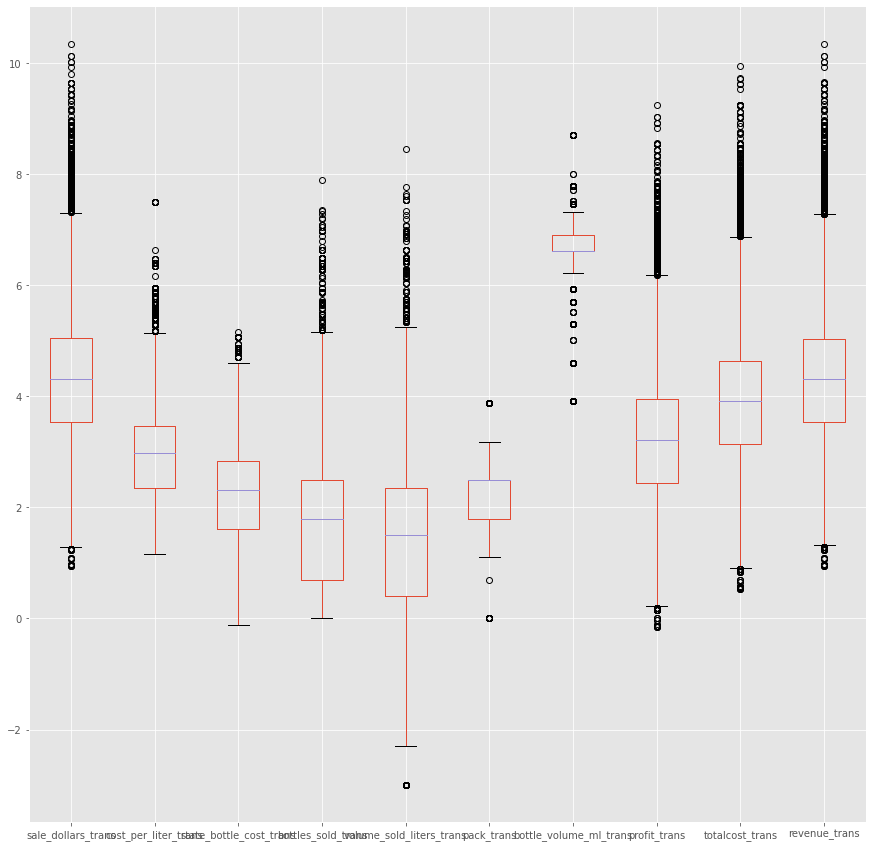

In [6]:
# Since we transformed a number of continuous variables, we can drop them so that we are working directly on our normalized data


# Remove unwanted columns, which include all the specific liquor categories, 
# except for liquor_category_WHISKY since that is what we want to classify on, along
# with all the store_ attributes
"""
cat_vars=['counter', 'liquor_category', 'store_parent',
 'month', 'year', 'monthyear', 'liquor_category_AMARETTO', 'liquor_category_BRANDY', 'liquor_category_GIN', 
 'liquor_category_LIQUEUR', 'liquor_category_Other', 'liquor_category_RUM', 'liquor_category_SCHNAPPS', 
 'liquor_category_TEQUILA', 'liquor_category_VODKA', 'month_Apr', 'month_Aug', 'month_Dec', 'month_Feb',
 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep', 
 'store_parent_CVS', 'store_parent_Caseys', 'store_parent_Hy-Vee', 'store_parent_Kum&Go', 
 'store_parent_Other', 'store_parent_QuikTrip', 'store_parent_SamsClub', 'store_parent_SmokingJoes', 
 'store_parent_Target', 'store_parent_Wal-Mart', 'store_parent_Walgreens']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
"""
#keep our transformed detail, along with the timing and store name detail

to_keep=['sale_dollars_trans', 'cost_per_liter_trans',
      'state_bottle_cost_trans', 'bottles_sold_trans',
       'volume_sold_liters_trans','pack_trans', 'bottle_volume_ml_trans', 
       'profit_trans', 'totalcost_trans', 'revenue_trans', 'id_label']
data_final=data[to_keep]
data_final.columns.values

#boxplot of all the variables
plt.figure(figsize=(15, 15))
ax = data_final.boxplot()
#ax.set_yscale('log')

print(data_final.shape)

In [7]:
data_final.head()

,sale_dollars_trans,cost_per_liter_trans,state_bottle_cost_trans,bottles_sold_trans,volume_sold_liters_trans,pack_trans,bottle_volume_ml_trans,profit_trans,totalcost_trans,revenue_trans,id_label
0,4.750136,2.735233,1.348073,2.995732,2.014903,2.995732,5.926926,3.653252,4.343805,4.750136,1
1,2.574900,5.570632,2.169054,0.000000,-2.995732,2.079442,3.912023,1.477049,2.169054,2.574900,1
2,5.000585,3.208825,2.803360,1.791759,1.791759,2.484907,6.907755,3.901973,4.595120,5.000585,2
3,6.636261,3.745890,3.052585,3.178054,2.890372,1.791759,6.620073,5.537964,6.230639,6.636261,3
4,5.121819,2.077296,2.231089,2.484907,3.044522,1.791759,7.467371,4.023922,4.715996,5.121819,1


In [8]:
data_final = data_final[data_final['id_label'] < "8"]
data_final = data_final[data_final['id_label'] != "10"]
data_final['id_label'].value_counts()

6    13108
3     9045
7     5515
5     5360
4     2853
1     2386
2     1716
Name: id_label, dtype: int64


Running a quick df describe, we can se that almost all of our variables are floats to account for the transformations. With the id_label and store parent being an object features that might relate to clusters we are looking to use in our datasets. The last feature pack is represented as an int, which makes sense because they are typically sold in packs of 6, 12, 24 and 48.

In [9]:
data_final.describe()

,sale_dollars_trans,cost_per_liter_trans,state_bottle_cost_trans,bottles_sold_trans,volume_sold_liters_trans,pack_trans,bottle_volume_ml_trans,profit_trans,totalcost_trans,revenue_trans
count,39983.000000,39983.000000,39983.000000,39983.000000,39983.000000,39983.000000,39983.000000,39983.000000,39983.000000,39983.000000
mean,4.298304,2.971772,2.235141,1.657834,1.326531,2.334540,6.576575,3.200567,3.892975,4.298687
std,1.127910,0.865457,0.783014,1.106266,1.384870,0.525817,0.762560,1.127875,1.128033,1.127980
min,0.943906,1.163151,-0.116534,0.000000,-2.995732,0.000000,3.912023,-0.150823,0.536493,0.943906
25%,3.542697,2.345645,1.607436,0.693147,0.405465,1.791759,6.620073,2.446685,3.138966,3.544432
50%,4.319087,2.987700,2.306577,1.791759,1.504077,2.484907,6.620073,3.222071,3.912823,4.319087
75%,5.051393,3.465319,2.839078,2.484907,2.351375,2.484907,6.907755,3.944973,4.636521,5.042520
max,10.352874,7.495542,5.164729,7.901007,8.460623,3.871201,8.699515,9.254262,9.947409,10.352874


### Pair Plots

To explore our joint attributes, we are going to run a pairplot matrix grouped by liquor category across our top 4 feature correlations as determined from lab 2.  
* cost_per_liter_trans
* state_bottle_cost_trans
* sale_dollar_trans
* totalcost_trans

Here we can see scatter plots that show our correlations in action. 

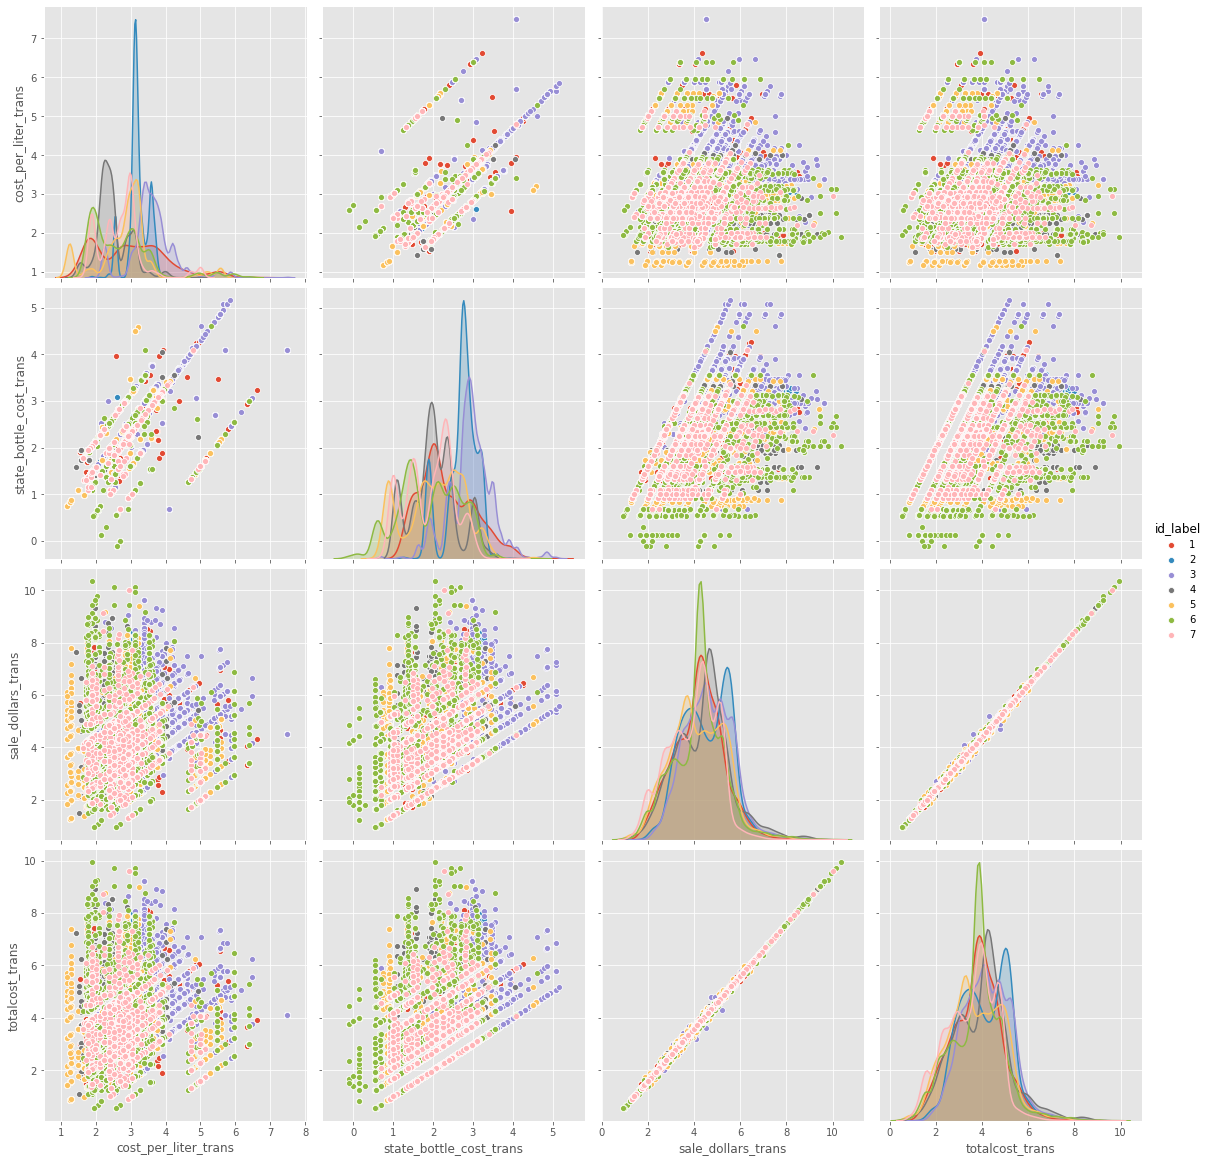

In [10]:
# Create plots for the top 4 features as found from lab 2
# cost_per_liter_trans, state_bottle_cost_trans, sale_dollars_trans, totalcost_trans
import seaborn as sns
sns.pairplot(data_final, height=4, hue= 'id_label', vars = ['cost_per_liter_trans', 'state_bottle_cost_trans', 'sale_dollars_trans', 'totalcost_trans'])

To further explore our joint attributes, we wanted to look at the pair plots across all 10 attributes:

* sale_dollars_trans
* cost_per_liter_trans
* state_bottle_cost_trans
* bottles_sold_trans
* volume_sold_liters_trans
* pack_trans
* bottle_volume_ml_trans
* profit_trans
* totalcost_trans
* revenue_trans

Visualizing all 10 attributes against each other will help determine if we see some clustering appear across other attributes that weren't in our top 4 features from lab 2.

Start to see some nice clustering around bottles_sold_trans and profit_trans, totalcost_trans, and revenue_trans.

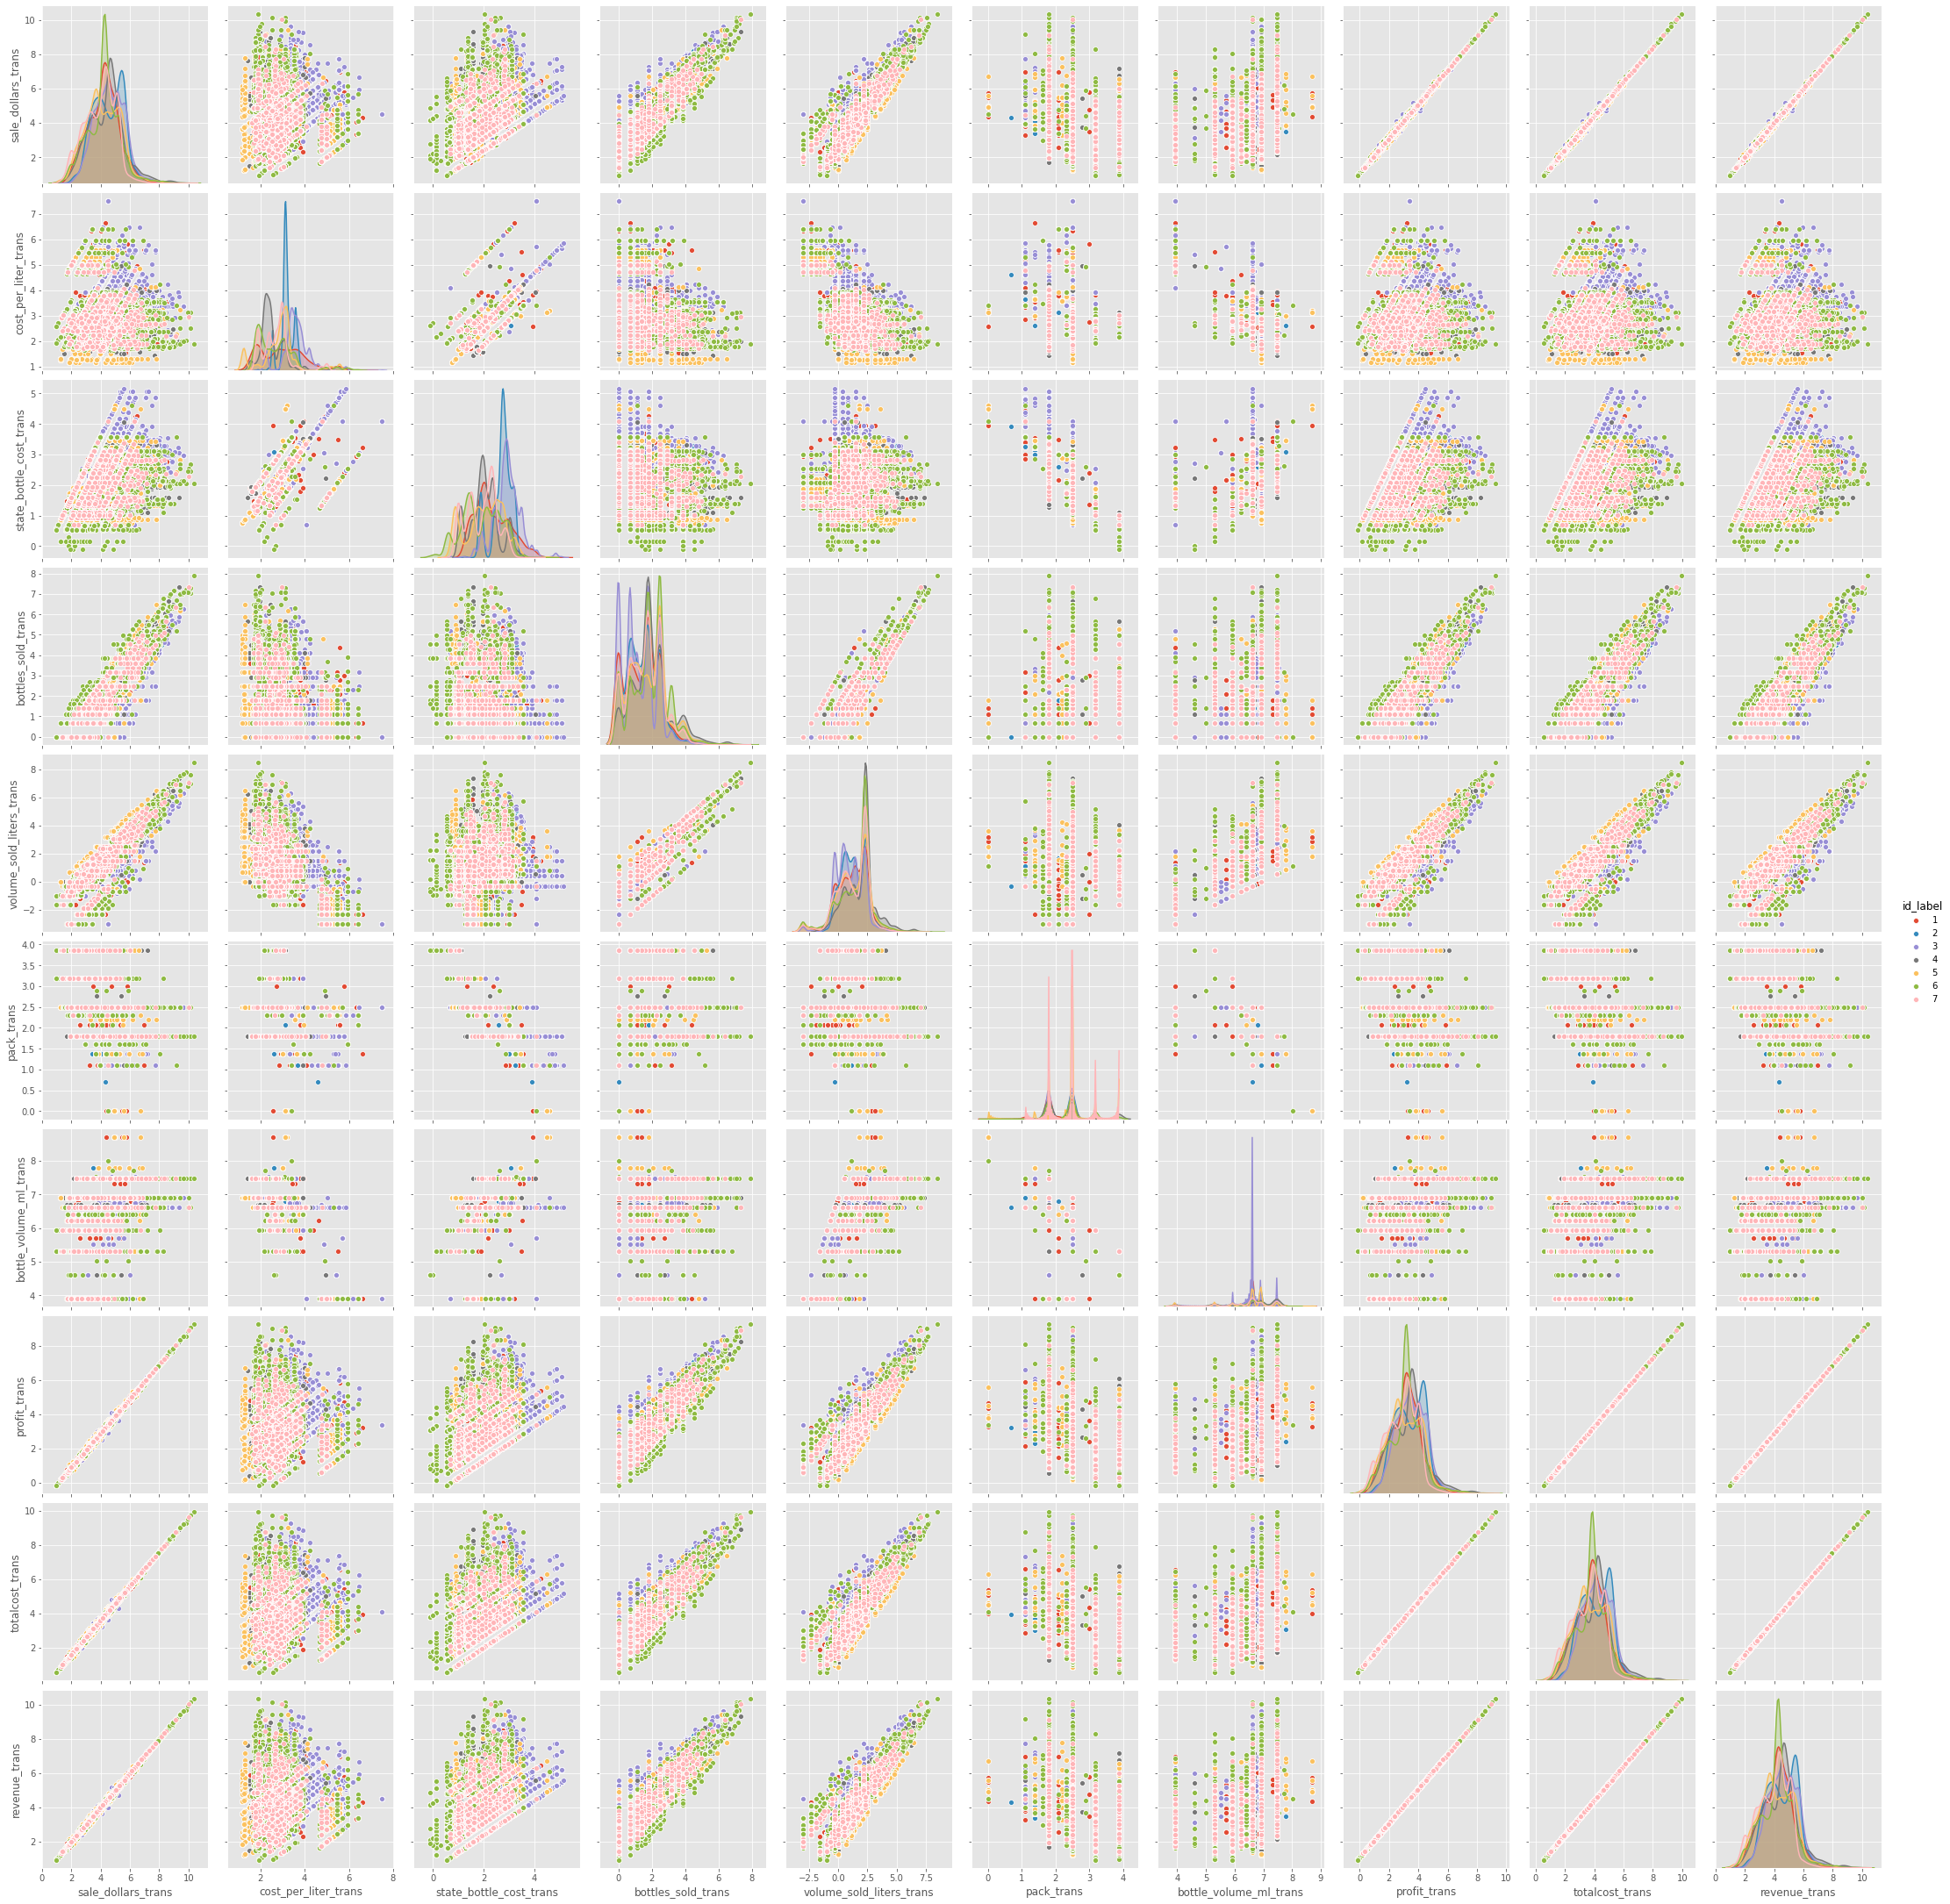

In [11]:
# Pairplot across all 10 attributes
import seaborn as sns
sns.pairplot(data_final, height=3, hue= 'id_label', vars = ['sale_dollars_trans', 'cost_per_liter_trans', 'state_bottle_cost_trans', 'bottles_sold_trans', 'volume_sold_liters_trans', 'pack_trans', 'bottle_volume_ml_trans', 'profit_trans', 'totalcost_trans', 'revenue_trans'])

### Correlation Matrix

Correlation matrix dives deeper into the relationship between all 10 of the varialbes in our dataset.  

To measure this, we will be able to run grid plots and heat maps with each feature against one another. The plots that are highly correlated will be closer to 1 while the plots that are highly negatively correlated will be closer to -1. 

Looking at a heat map of our correlation plot, we can see some interesting occurrences happening in the bottom right corner with regards to costs and revenue.

In addition, the bottles_sold_trans and volume_sold_liters_trans is highly correlated at 0.75 and .78 respecvitely to sale_dollars_trans.

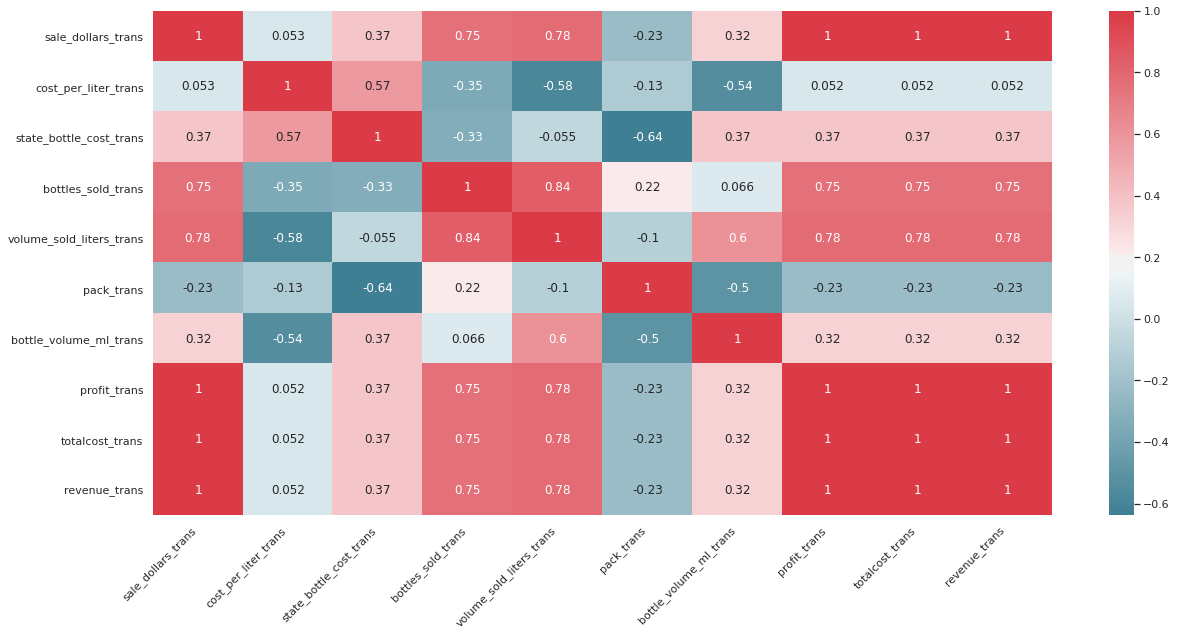

In [12]:
# plot the correlation matrix using seaborn
# https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

# drop the counter attribute as that was used above when dealing with missing values
#del df['counter']

# show the heatmap
sns.set(style="darkgrid") # one of the many styles to plot using
f, ax = plt.subplots(figsize=(18, 9))
chart=sns.heatmap(data_final.corr(), cmap=cmap, annot=True)
chart.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
f.tight_layout()

## Modeling and Evaluation 1 (10 points)

Different tasks will require different evaluation methods. Be as thorough as possible when analyzing the data you have chosen and use visualizations of the results to explain the performance and expected outcomes whenever possible. Guide the reader through your analysis with plenty of discussion of the results. Each option is broken down by:

Train and adjust parameters (10 Points)
• Train: Perform cluster analysis using several clustering methods (adjust parameters).  

+++

For this data, we will be attempting to cluster our data on the basis of the liquor type that we classified against in lab 2, and apply that cluster into our classifier model as an an additional feature that could strengthen our classifier. Ad described in our business understanding section, our dataset consists of a number of features that can track the sales and records of purchases made in the state of Iowa from wholesaler to retailer. This can include quantanty detail on how much alcohol was sold during the purchase, how much the sale was for, how much profit was made, and other additional features slicing and dicing those details. The dataset includes all of 2019 data and tracks sales all over the state of Iowa. 

Our goal with the cluster is to cluster each data point based on which of the 7 possible liquor types corresponding to it. Each record in the dataset has been formatted dso that it represents a single sale between liquor retailer and wholealer. The liquor type varies by each instance and can represent a wide variety of sale sizes and prices, so we will need to use a clustering algorithm without a known liquor type for each designation. To do this, we will attempt to cluster with 7 total clusters defined by 3 different clustering algorithm corresponding with each of the liquor types present. We will begin the analysis of all observations aggregated together:

In [13]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import metrics as mt

cv = StratifiedKFold(n_splits=10)

features = ['sale_dollars_trans', 'cost_per_liter_trans', 
       'state_bottle_cost_trans', 'bottles_sold_trans',
       'volume_sold_liters_trans', 'pack_trans', 'bottle_volume_ml_trans',
       'profit_trans', 'totalcost_trans', 'revenue_trans']

X2 = data_final[features].copy()

scaler = StandardScaler()
scaler.fit(X2)

#This makes our model's coefficients take on the same scale for accurate feature importance analysis
#Notice we scaled the data before the cross validation
X = scaler.transform(X2)

Y= data_final[['id_label']].copy()

CPU times: user 14 ms, sys: 0 ns, total: 14 ms
Wall time: 15.6 ms


In [0]:
from sklearn import metrics as mt

# train and test split before resampling
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.2, random_state = 101) 

In [15]:

print("Before OverSampling, counts of label 'Other': {}".format(sum(y1_train['id_label'] == "1")))
print("Before OverSampling, counts of label 'GIN': {} \n".format(sum(y1_train['id_label'] == "2"))) 
print("Before OverSampling, counts of label 'WHISKY': {} \n".format(sum(y1_train['id_label'] == "3"))) 
print("Before OverSampling, counts of label 'TEQUILA': {}".format(sum(y1_train['id_label'] == "4")))
print("Before OverSampling, counts of label 'LIQUEUR': {} \n".format(sum(y1_train['id_label'] == "5"))) 
print("Before OverSampling, counts of label 'VODKA': {} \n".format(sum(y1_train['id_label'] == "6"))) 
print("Before OverSampling, counts of label 'RUM': {} \n".format(sum(y1_train['id_label'] == "7"))) 


# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X1_train_res, y1_train_res = sm.fit_sample(X1_train, y1_train.values.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X1_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y1_train_res.shape)) 
  
print("After OverSampling, counts of label 'Other': {}".format(sum(y1_train_res == "1"))) 
print("After OverSampling, counts of label 'GIN': {}".format(sum(y1_train_res == "2"))) 
print("After OverSampling, counts of label 'WHISKY': {}".format(sum(y1_train_res == "3"))) 
print("After OverSampling, counts of label 'TEQUILA': {}".format(sum(y1_train_res == "4"))) 
print("After OverSampling, counts of label 'LIQUEUR': {}".format(sum(y1_train_res == "5"))) 
print("After OverSampling, counts of label 'VODKA': {}".format(sum(y1_train_res == "6"))) 
print("After OverSampling, counts of label 'RUM': {}".format(sum(y1_train_res == "7"))) 

Before OverSampling, counts of label 'Other': 1902
Before OverSampling, counts of label 'GIN': 1374 

Before OverSampling, counts of label 'WHISKY': 7242 

Before OverSampling, counts of label 'TEQUILA': 2289
Before OverSampling, counts of label 'LIQUEUR': 4275 

Before OverSampling, counts of label 'VODKA': 10504 

Before OverSampling, counts of label 'RUM': 4400 

After OverSampling, the shape of train_X: (73528, 10)
After OverSampling, the shape of train_y: (73528,) 

After OverSampling, counts of label 'Other': 10504
After OverSampling, counts of label 'GIN': 10504
After OverSampling, counts of label 'WHISKY': 10504
After OverSampling, counts of label 'TEQUILA': 10504
After OverSampling, counts of label 'LIQUEUR': 10504
After OverSampling, counts of label 'VODKA': 10504
After OverSampling, counts of label 'RUM': 10504


In [0]:
X2.columns
X1DF = pd.DataFrame(X1_train_res, columns =X2.columns)

In [17]:
print(y1_train_res.shape)
ydf = pd.DataFrame(y1_train_res)

(73528,)


### Dimensionality reduction  

The following section uses linear discrimeinant analysis to reduce the number of dimensions from ten to three. This explains 90+% of the variance of the data and allows us to view the data in chart fomat in two and three dimension.  It is easier to interpret meaning with less dimensions. 
TNSE is examined to determine if it might be better for our data than PCA and LDA were in the main lab. 

In [0]:
from sklearn.manifold import TSNE
import time
time_start = time.time()

tsne = TSNE(random_state=1, n_components=3).fit_transform(X1_train_res)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

In [0]:
tsne.shape

In [0]:
X_train_tnsedf=pd.DataFrame(tsne)
X_train_tnsedf.columns=['First Component','Second Component', 'Third Component']

In [0]:
tnseydf = X_train_tnsedf.merge(ydf, left_index=True, right_index=True)
tnseydf = tnseydf.rename(columns={0: 'Liquorlabel'})

In [0]:
tnseydf

The charts below shows a 2 and 3-d plot of the first,second, and third components derived from TNSE. Three dimension shows some seperation by liquor labels, but less obvious than the using just the first two primary components.  This shows that intuitively the liquor types have some speration in two dimension based on the two primary components. 

In [0]:
import seaborn as sns
sns.pairplot(tnseydf, height=3, hue= 'Liquorlabel', vars = ['First Component', 'Second Component'])

In [0]:
X1 = tnseydf['First Component']
Y1 = tnseydf['Second Component'] 
Z1 = tnseydf['Third Component']
L1 = tnseydf['Liquorlabel'].astype(int)

In [0]:
plt.rcParams["figure.figsize"] = (20,10)
ax = plt.axes(projection='3d')
ax.scatter(X1, Y1, Z1, c=L1, cmap='Accent', linewidth=1)

ax.set_xlabel('First')
ax.set_ylabel('Second')
ax.set_zlabel('Third')
plt.title('TNSE data exploration')

### Basic Clustering
The clustering in this section will be on the LDA components with basic clustering algorithms. This clustering will help get an understanding of how the algorithms are working with default parameters before moving on to more advanced techniques in the GMM Clustering section and beyond. 

#### Clustering with TNSE

In [0]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss2 = []
K2 = range(1,15)
for k in K2:
    km3 = KMeans(n_clusters=k)
    km3 = km3.fit(X_train_tnsedf)
    wcss2.append(km3.inertia_)
plt.plot(K2, wcss2, 'bx-')
plt.xlabel('Number of centroids')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

In [0]:
from sklearn.cluster import KMeans

#converting our projected array to pandas df

#build our algorithm with k=7, train it on pca and make predictions
#kmeanslda = KMeans(n_clusters=7, init='k-means++', random_state=1,n_init=5, tol=.0001).fit(X_train_ldadf)
#n_clusters=7, init='k-means++',random_state=1, n_init=5, tol=.0001
kmeanstnse = KMeans(n_clusters=13, init='random', random_state=1, n_init=5, tol=.0001).fit(X_train_tnsedf)
y_kmeanstnse = kmeanstnse.predict(X_train_tnsedf)
newfeaturetnse = kmeanstnse.labels_
X1CVTNSE = np.column_stack((X_train_tnsedf,pd.get_dummies(newfeaturetnse)))
#plotting the results 
plt.scatter(X_train_tnsedf['First Component'], X_train_tnsedf['Second Component'], c=y_kmeanstnse, s=50, alpha=0.5,cmap='viridis')
centerstnse = kmeanstnse.cluster_centers_
plt.scatter(centerstnse[:, 0], centerstnse[:, 1], c='red', s=50)
plt.scatter(centerstnse[:, 0], centerstnse[:, 1], c='red', s=50)

In [0]:
X1P = X_train_tnsedf['First Component']
Y1P = X_train_tnsedf['Second Component'] 
Z1P = X_train_tnsedf['Third Component']
L1P = y_kmeanstnse

In [0]:
from sklearn.metrics import silhouette_score

# Get silhouette score
knnb_sil = silhouette_score(X_train_tnsedf, L1P, random_state=1)
print("Average KNN Silhouette Score:", knnb_sil)

In [0]:
plt.rcParams["figure.figsize"] = (20,10)
ax = plt.axes(projection='3d')
ax.scatter(X1P, Y1P, Z1P, c=L1P, cmap='Accent', linewidth=1)

ax.set_xlabel('First')
ax.set_ylabel('Second')
ax.set_zlabel('Third')
plt.title('TNSE Clustering with basic Kmeans')

In [0]:
from sklearn.mixture import GaussianMixture as GMM
# Fit 7 clusters using 'spherical' covariance type
gmm_sphere = GMM(n_components=7,
          random_state=1,
          covariance_type='spherical'
          )
gmm_X_sphere = X_train_tnsedf
gmm_sphere.fit(gmm_X_sphere)
gmm_clusters_sphere = gmm_sphere.predict(gmm_X_sphere)

In [0]:
X1P = X_train_tnsedf['First Component']
Y1P = X_train_tnsedf['Second Component'] 
Z1P = X_train_tnsedf['Third Component']
L1P = gmm_clusters_sphere

In [0]:
from sklearn.metrics import silhouette_score

# Get silhouette score
gmmsimp_sil = silhouette_score(X_train_tnsedf, L1P, random_state=1)
print("Average GMM Silhouette Score:", gmmsimp_sil)

Text(0.5, 0.92, 'LDA Clustering with basic GMM')

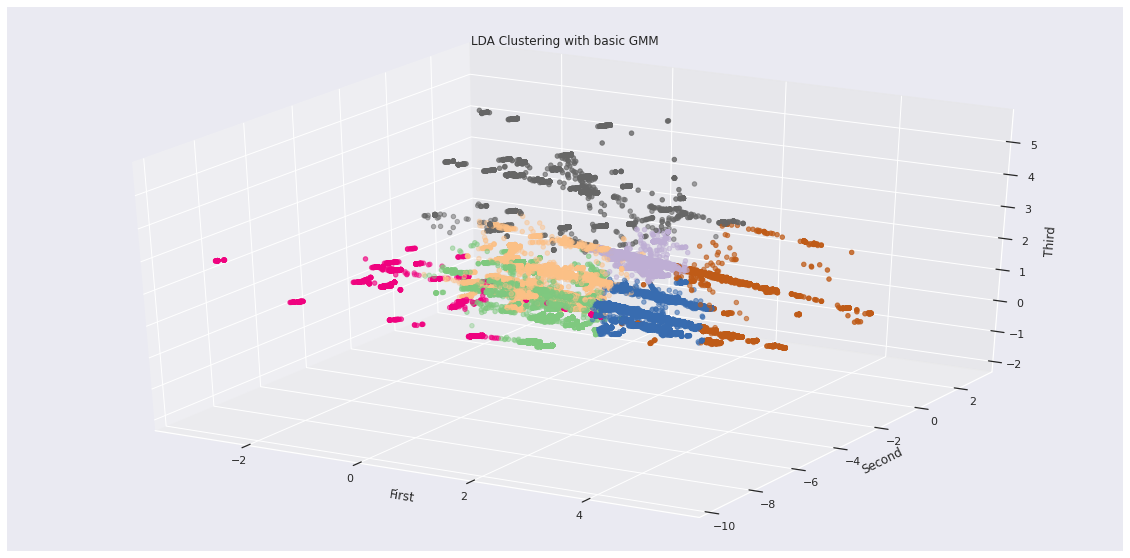

In [0]:
plt.rcParams["figure.figsize"] = (20,10)
ax = plt.axes(projection='3d')
ax.scatter(X1P, Y1P, Z1P, c=L1P, cmap='Accent', linewidth=1)

ax.set_xlabel('First')
ax.set_ylabel('Second')
ax.set_zlabel('Third')
plt.title('TNSE Clustering with basic GMM')

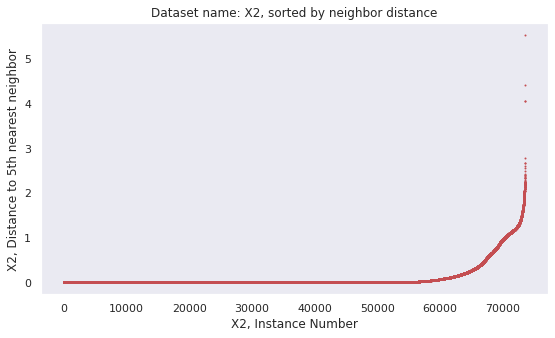

In [0]:
# lets first look at the connectivity of the graphs and distance to the nearest neighbors
from sklearn.neighbors import kneighbors_graph

#=======================================================
# CHANGE THESE VALUES TO ADJUST MINPTS FOR EACH DATASET
X2_N = 5
#=======================================================

# create connectivity graphs before calcualting the hierarchy
X2_knn_graph = kneighbors_graph(X_train_tnsedf, X2_N, mode='distance') # calculate distance to four nearest neighbors


N2 = X2_knn_graph.shape[0]
X2_4nn_distances = np.zeros((N2,1))
for i in range(N2):
    X2_4nn_distances[i] = X2_knn_graph[i,:].max()

X2_4nn_distances = np.sort(X2_4nn_distances, axis=0)


plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(range(N2), X2_4nn_distances, 'r.', markersize=2) #plot the data
plt.title('Alcohol: X2, sorted by neighbor distance')
plt.xlabel('X2, Instance Number')
plt.ylabel('X2, Distance to {0}th nearest neighbor'.format(X2_N))
plt.grid()

In [0]:
%%time 

from sklearn.cluster import DBSCAN

#=====================================
# ENTER YOUR CODE HERE TO CHANGE MINPTS AND EPS FOR EACH DATASET
X2_minpts = X2_N # from above
X2_eps = 1.1
#=====================================



db2 = DBSCAN(eps=X2_eps, min_samples=X2_minpts).fit(X_train_tnsedf)
labels2 = db2.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels2)) - (1 if -1 in labels2 else 0)

# mark the samples that are considered "core"
core_samples_mask2 = np.zeros_like(db2.labels_, dtype=bool)
core_samples_mask2[db2.core_sample_indices_] = True

plt.figure(figsize=(15,4))
unique_labels2 = set(labels2) # the unique labels
colors2 = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels2)))


CPU times: user 958 ms, sys: 3.97 ms, total: 962 ms
Wall time: 966 ms


<Figure size 1080x288 with 0 Axes>

In [0]:
n_clusters_

1727

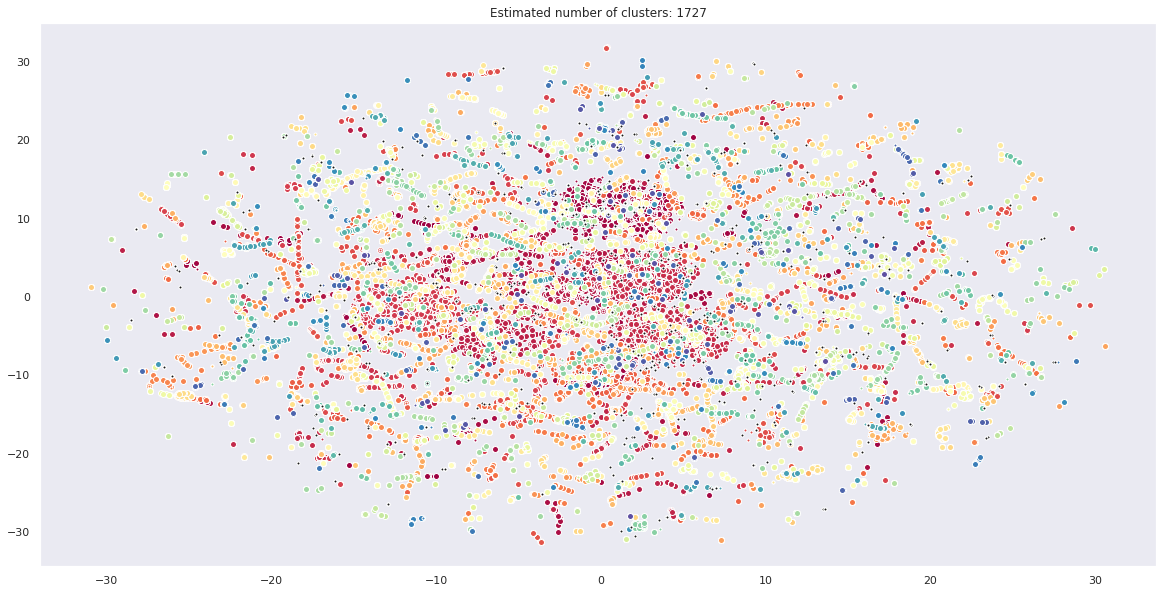

In [0]:
for k, col in zip(unique_labels2, colors2):
        if k == -1:
            # Black used for noise.
            col = 'k'

        class_member_mask2 = (labels2 == k)

        xy2 = X_train_tnsedf[class_member_mask2 & core_samples_mask2]
#        print(xy2['First Component'], xy2['Second Component'])
        # plot the core points in this class
        plt.plot(xy2['First Component'], xy2['Second Component'], 'o', markerfacecolor=col,
                 markeredgecolor='w', markersize=6)

        # plot the remaining points that are edge points
        xy2 = X_train_tnsedf[class_member_mask2 & ~core_samples_mask2]
        plt.plot(xy2['First Component'], xy2['Second Component'], 'o', markerfacecolor=col,
                 markeredgecolor='w', markersize=3)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.grid()
plt.show()

In [0]:
from sklearn.metrics import silhouette_score

# Get silhouette score
dbscan_sil = silhouette_score(X_train_tnsedf, labels2, random_state=1)
print("Average DB Scan Silhouette Score:", dbscan_sil)

Average DB Scan Silhouette Score: 0.7437704


In [0]:
X1P = X_train_tnsedf['First Component']
Y1P = X_train_tnsedf['Second Component'] 
Z1P = X_train_tnsedf['Third Component']
L1P = labels2

Text(0.5, 0.92, 'TNSE Clustering with basic DBSCAN')

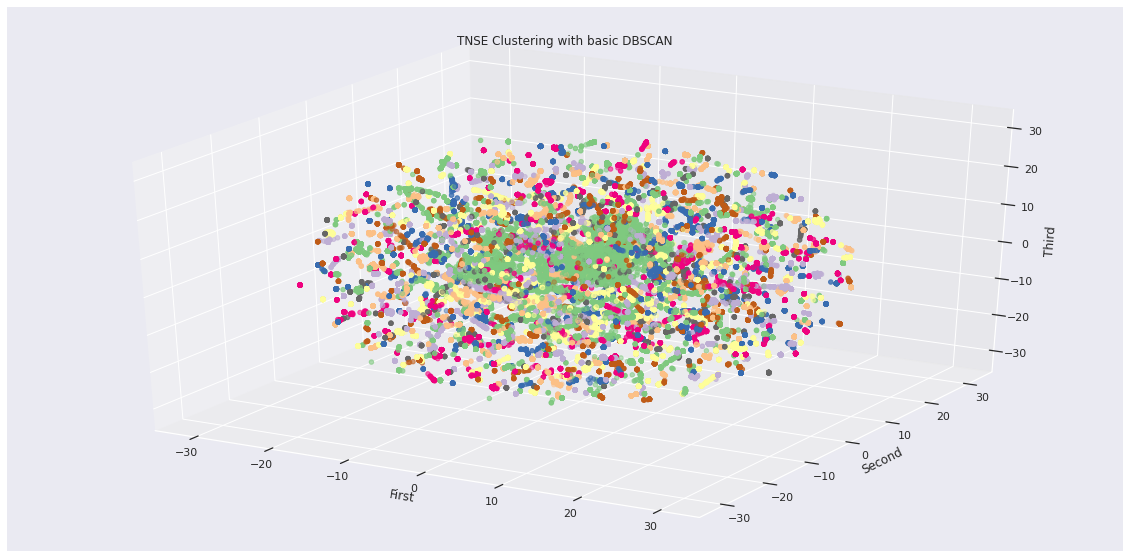

In [0]:
plt.rcParams["figure.figsize"] = (20,10)
ax = plt.axes(projection='3d')
ax.scatter(X1P, Y1P, Z1P, c=L1P, cmap='Accent', linewidth=1)

ax.set_xlabel('First')
ax.set_ylabel('Second')
ax.set_zlabel('Third')
plt.title('TNSE Clustering with basic DBSCAN')

In [0]:
labels2df = pd.DataFrame(labels2, columns = ["Cluster_Label"])

In [0]:
tnsefmergedf = data.merge(labels2df, left_index=True, right_index=True)

#### Baseline Random Forest Classification

The Random Forest Classifcation shown here was the best classifier found in a prior analysis. (Lab2 link). This analysis is places here to use as a comparision to the basic clusters found with the LDA data. It will be used to cross validate to see if clustering is providing information that resembles the liquor categories. This comparion will not be used in the more advanced section as more clusters will be used and clusters will most likely not represent liquor categories, but some other unseen and or unknown groupings that we will need to explore the results of to find meaning.

In [0]:
%%time
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

cv = StratifiedKFold(n_splits=10)
#trained one time then dumped out to google drive for re-use withouth having to re-train
#clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
#                       criterion='gini', max_depth=20, max_features='auto',
#                       max_leaf_nodes=None, max_samples=None,
#                       min_impurity_decrease=0.0, min_impurity_split=None,
#                       min_samples_leaf=1, min_samples_split=2,
#                       min_weight_fraction_leaf=0.0, n_estimators=500,
#                       n_jobs=None, oob_score=False, random_state=101,
#                       verbose=0, warm_start=False)

CPU times: user 24 µs, sys: 6 µs, total: 30 µs
Wall time: 33.4 µs


In [0]:
tnsefmergedf.to_csv("/content/drive/My Drive/ColabNotebooks/tnsefmergedf.csv")

In [0]:
from google.colab import drive
drive.mount('/content/drive/')
#My Drive/ColabNotebooks/')
url_rfmodel = '/content/drive/My Drive/ColabNotebooks/rfmodelbasecluster.joblib'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
#exporting model to drive
from joblib import dump, load
#dump(clf, url_rfmodel) 

In [0]:
%%time
#importing model to new model name
clf = load(url_rfmodel)

CPU times: user 1.66 ms, sys: 0 ns, total: 1.66 ms
Wall time: 312 ms


In [0]:
#X1_train_res, y1_train_res
acc = cross_val_score(clf,X1_train_res,y=y1_train_res,cv=cv)

print ("Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

Average accuracy =  93.538510037948 +- 0.2929879105905672
